In [1]:
from coders import RMSQAM as Coder, BitStream
from coders.pipeline import Pipeline
from coders.ga import Population
import warnings
warnings.filterwarnings('ignore')

pipeline = Pipeline('.', no_lock=False)

gen_iter = 30
gen_time = 600

[20508] Lock acquired: 8


In [2]:
def coder_fitness(cutoff=0.95, size=300):
    def fn(coder, raw=False):
        input_source = BitStream(np.random.randint(2, size=size))
        r, q = pipeline.test(coder, input_source)
        if q < cutoff:
            r = 0
        if raw:
            return r, q
        return r * q ** 5
    return fn

In [3]:
population = Population(Coder, coder_fitness(0), 200, 0.2, 0.1)
population.evolve(10000, max_iter=2*gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.70)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.90)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.95)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.98)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)

Gen 1 grades: 2711/2004/1097
Gen average time: 0:00:26.335079
Gen 2 grades: 3099/2368/1455
Gen average time: 0:00:26.353746
Gen 3 grades: 3210/2697/1851
Gen average time: 0:00:26.325578
Gen 4 grades: 3644/2934/2176
Gen average time: 0:00:25.977493
Gen 5 grades: 3629/2994/2302
Gen average time: 0:00:25.751791
Gen 6 grades: 3676/2959/2285
Gen average time: 0:00:25.506052
Gen 7 grades: 3566/3039/2377
Gen average time: 0:00:25.341691
Gen 8 grades: 3653/3134/2535
Gen average time: 0:00:24.891404
Gen 9 grades: 3400/3136/2351
Gen average time: 0:00:24.716144
Gen 10 grades: 3706/3153/2449
Gen average time: 0:00:24.541066
Gen 11 grades: 3775/3124/2516
Gen average time: 0:00:24.347440
Gen 12 grades: 3735/3182/2437
Gen average time: 0:00:24.190420
Gen 13 grades: 3979/3260/2563
Gen average time: 0:00:24.278066
Gen 14 grades: 3728/3216/2408
Gen average time: 0:00:24.372175
Gen 15 grades: 3629/3176/2399
Gen average time: 0:00:24.550346
Gen 16 grades: 3775/3235/2413
Gen average time: 0:00:24.599195
G

In [4]:
sg = np.array([sorted(grades, reverse=True) for grades in population.grades])
top75 = sg[:, :3 * population.size // 4].mean(axis=1)
top25 = sg[:, :population.size // 4].mean(axis=1)
top1 = sg[:, :1].mean(axis=1)

out/RMSQAM_GA_2822387020352.pdf


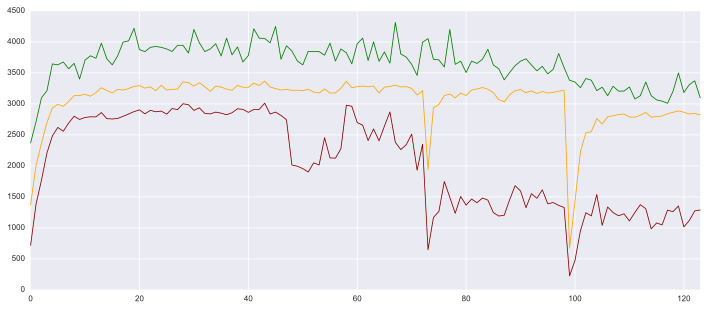

In [5]:
f = 'out/{}_GA_{}.pdf'.format(Coder.__name__, id(pipeline))
sns.tsplot(top75, color='darkred')
sns.tsplot(top25, color='orange')
sns.tsplot(top1, color='green')
print(f)
plt.savefig(f, bbox_inches='tight', pad_inches=0)
plt.show()

In [6]:
for c in population._sort(10000):
    print(c)

RMSQAM:
    symbol_shifts: 4
    sqe_end: 0.07515274571491723
    amplitude: 0.4453037161702394
    symbol_duration: 0.0009723378309511937
    filter_shape: 0.601638181703261
    rate: 96000
    sqe_start: 0.29335807542856707
    d_low_amplitude: 0.3026714552998828
    filter_window_base: 23
    sqe_start_v: 0.2996882041427758
    peak_width_start: 0.6304361357712143
    filter_std_scale: 0.38628234740900014
    peak_width_span: 0.6403192442324814
    frequency: 2384
    peak_threshold: 0.4651492505107728
    filter_type: 0
    filter_std_base: 7
    low_amplitude: 0.5335400374768207
    symbol_levels: 2
    d_high_amplitude: 0.6052383710983735
    high_amplitude: 0.6685065760180908
    filter_window_scale: 0.4581629144280806
    sqe_end_v: 0.7255453434451529
    d_comparison_type: 1
    d_symbol_shifts_scale: 4
    symbol_width: 3
RMSQAM:
    symbol_shifts: 4
    sqe_end: 0.08169163058373534
    amplitude: 0.17492623650062283
    symbol_duration: 0.0009849431941293652
    filter_shape

In [8]:
population.evolve(10000, max_iter=3*gen_iter, max_time=gen_time)

Gen 124 grades: 3043/2818/857
Gen average time: 0:00:24.336930
Gen 125 grades: 3381/2857/898
Gen average time: 0:00:24.277605
Gen 126 grades: 3497/2879/1021
Gen average time: 0:00:24.125125
Gen 127 grades: 3200/2919/1163
Gen average time: 0:00:23.888028
Gen 128 grades: 3147/2850/874
Gen average time: 0:00:23.719193
Gen 129 grades: 3147/2875/974
Gen average time: 0:00:23.466865
Gen 130 grades: 3168/2897/939
Gen average time: 0:00:23.265096
Gen 131 grades: 3332/2901/979
Gen average time: 0:00:23.142935
Gen 132 grades: 3701/2899/789
Gen average time: 0:00:23.115268
Gen 133 grades: 3325/2732/683
Gen average time: 0:00:23.144961
Gen 134 grades: 3095/2860/967
Gen average time: 0:00:23.173606
Gen 135 grades: 3095/2850/1081
Gen average time: 0:00:23.168593
Gen 136 grades: 3310/2836/877
Gen average time: 0:00:23.173834
Gen 137 grades: 3254/2822/814
Gen average time: 0:00:23.208088
Gen 138 grades: 3147/2789/731
Gen average time: 0:00:23.191471
Gen 139 grades: 3540/2907/1154
Gen average time: 0:0

In [9]:
sg = np.array([sorted(grades, reverse=True) for grades in population.grades])
top75 = sg[:, :3 * population.size // 4].mean(axis=1)
top25 = sg[:, :population.size // 4].mean(axis=1)
top1 = sg[:, :1].mean(axis=1)

out/RMSQAM_GA_2822387020352_2.pdf


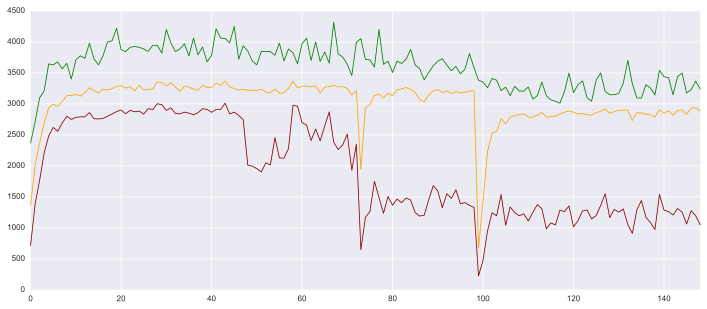

In [10]:
f = 'out/{}_GA_{}_2.pdf'.format(Coder.__name__, id(pipeline))
sns.tsplot(top75, color='darkred')
sns.tsplot(top25, color='orange')
sns.tsplot(top1, color='green')
print(f)
plt.savefig(f, bbox_inches='tight', pad_inches=0)
plt.show()

In [11]:
for c in population._sort(10000):
    print(*coder_fitness(0, 3000)(c, raw=True))
    # print(c)

3348.8372093023254 0.978
3512.19512195122 0.9513333333333334
3164.835164835165 0.987
3272.727272727273 0.9793333333333333
3096.7741935483873 0.9843333333333333
3164.835164835165 0.987
3164.835164835165 0.974
3272.727272727273 0.9686666666666667
3272.727272727273 0.961
3272.727272727273 0.9656666666666667
3272.727272727273 0.9706666666666667
3272.727272727273 0.98
3272.727272727273 0.9716666666666667
3063.8297872340427 0.9696666666666667
3164.835164835165 0.974
3272.727272727273 0.9706666666666667
3096.7741935483873 0.9756666666666667
3200.0 0.9833333333333333
3200.0 0.9846666666666667
3200.0 0.971
3200.0 0.952
3031.578947368421 0.9793333333333333
3063.8297872340427 0.9663333333333334
3063.8297872340427 0.979
3031.578947368421 0.983
3031.578947368421 0.9816666666666667
3031.578947368421 0.978
3031.578947368421 0.9693333333333334
3164.835164835165 0.9856666666666667
3164.835164835165 0.978
3164.835164835165 0.9816666666666667
3031.578947368421 0.9796666666666667
3031.578947368421 0.983
3